In [1]:
import sys
import os
import numpy as np
from pathlib import Path
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp

# Ensure the parent directory is in the system path
sys.path.append(str(Path(os.getcwd()).resolve().parent))

# Import your custom QiskitService class
from api_connection import QiskitService

# Construct the absolute path to the .env file
env_path = str(Path(os.getcwd()).resolve().parent / "./../.env")

# Initialize your QiskitService
qiskit_service = QiskitService(env_path)

# Initialize the Qiskit Runtime service
service = QiskitRuntimeService()
# Select the backend
backend = qiskit_service.get_least_busy_backend()

print(backend)

Connected to IBM Quantum.
<IBMBackend('ibm_kyiv')>


In [19]:
# Define registers: 3 data qubits, classical bits for measurements
qr_data = QuantumRegister(7, 'qbit')
cr_data = ClassicalRegister(1, 'clasic')  # For initial measurements
circ = QuantumCircuit(qr_data, cr_data)
circ.h(qr_data[1])
circ.h(qr_data[2])
circ.h(qr_data[3])
circ.cx(qr_data[0], qr_data[5])
circ.cx(qr_data[0], qr_data[6])
circ.cx(qr_data[1], qr_data[0])
circ.cx(qr_data[1], qr_data[4])
circ.cx(qr_data[1], qr_data[5])

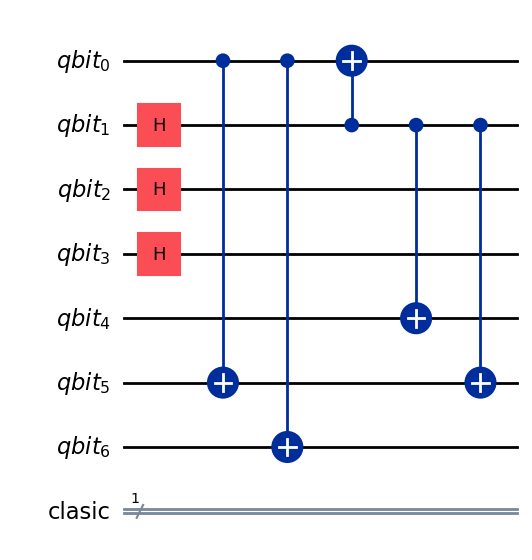

In [20]:
circ.draw('mpl')

In [21]:
circ.cx(qr_data[2], qr_data[0])

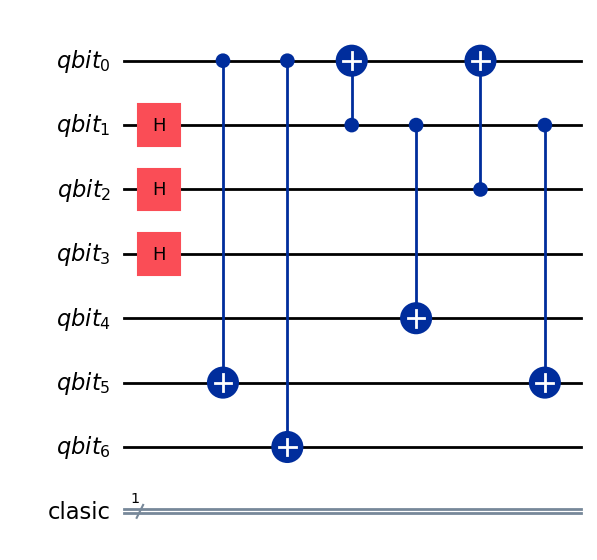

In [22]:
circ.draw('mpl')